<a href="https://colab.research.google.com/github/tentenvi/tteessstt/blob/main/lab3/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import median, mean, stdev
from math import erfc

df = pd.read_csv('/content/anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
#Удаление
df_cleaned = df.dropna()

df_cleaned

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
#Заполнение при помощи медианы
df_filled_median = df.fillna(df.median())

df_filled_median

<ipython-input-4-1d6bd374d546>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_median = df.fillna(df.median())


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [5]:
#Заполнение при помощи среднего
df_filled_mean = df.fillna(df.mean())

df_filled_mean

<ipython-input-5-20526bfdd642>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean = df.fillna(df.mean())


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [6]:
#Заполнение при помощи моды

df_filled_mode = df.fillna(df["members"].mode()[0])

df_filled_mode

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [25]:
df.describe()

,anime_id,rating,members
count,12394.000000,12164.000000,1.239400e+04
mean,14058.336857,6.492381,1.977575e+04
std,11452.122377,1.042628,6.055666e+04
min,1.000000,1.670000,5.000000e+00
25%,3486.500000,5.890000,2.290000e+02
50%,10273.500000,6.570000,1.589500e+03
75%,24788.000000,7.200000,9.938250e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
#Заполнение при помощи интерполяции
df_interpolated = df.interpolate()

df_interpolated

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


**Объясните**

Мы заменили отсутствующие данные в нашем наборе данных, используя следующие методы:

1. Удаление
    * Просто убрали все пустые значения.

2. Медиана
    * Заменили все пропущенные значения медианой.

3. Заполнение при помощи среднего
    * Заполнили отсутствующие значения средним значением этого столбца.

4. Мода
    * Заполнили отсутствующие значения модой этого столбца.

5. Заполнение при помощи интерполяции
    * Использовали интерполяцию для заполнения пропущенных значений в таблице, используя уже известные значения.

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


In [8]:
# import math
# from statistics import median, mean
# from sklearn.cluster import DBSCAN

# class Outline:
#   def __init__(self, df):
#     self.df = df
#   def detect_outline_by_quantile(self, column_name):
#         Q1 = self.df[column_name].quantile(0.25)
#         Q3 = self.df[column_name].quantile(0.75)
#         minimum = Q1 - 1.5 * (Q3 - Q1)
#         maximum = Q3 + 1.5 * (Q3 - Q1)
#         outliers = self.df[(self.df[column_name] < minimum) | (self.df[column_name] > maximum)]
#         return outliers
#   def detect_outline_by_mean_std(self,column_name,coef):
#         mean = self.df[column_name].mean()
#         median = self.df[column_name].median()
#         std = self.df[column_name].std()
#         n = self.df[column_name].count()
#         lower_bound = mean - coef  * std
#         upper_bound = mean + coef * std
#         outliners = self.df[(self.df[column_name] >= lower_bound) & (self.df[column_name]<=upper_bound)]
#         return outliners

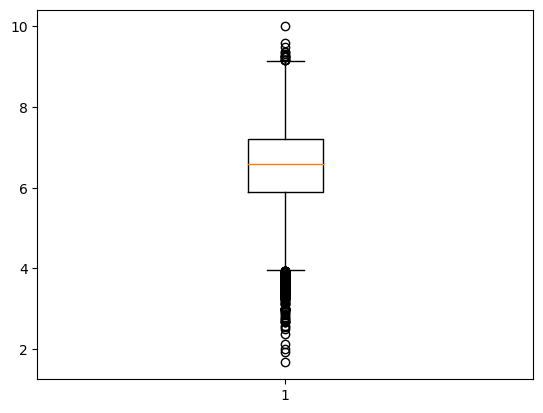

In [28]:

# so = Outline(df)
# outliners = so.detect_outline_by_mean_std("rating",1.5)
# print(outliners)

#Методом среднего
df = df.dropna()
plt.boxplot(df["rating"])
plt.show()

In [29]:
#При помощи межквартильного размаха

df["rating"].describe()

# so = Outline(df)
# outliners = so.detect_outline_by_quantile("rating")
# print(outliners)

count    12117.000000
mean         6.496779
std          1.039789
min          1.670000
25%          5.900000
50%          6.580000
75%          7.200000
max         10.000000
Name: rating, dtype: float64

In [30]:
#Статистика и объяснение
mean = df["rating"].mean()
std_deviation = df["rating"].std()
threshold = 3 * std_deviation

# Идентифицируем выбросы
outliers = [x for x in df["rating"] if abs(x - mean) > threshold]

# Выводим результаты
print("Среднее значение данных:", mean)
print("Стандартное отклонение данных:", std_deviation)
print('Межквартальный размах:', df['rating'].quantile(0.75)-df['rating'].quantile(0.25))
print("Потенциальные выбросы:", outliers)

Среднее значение данных: 6.4967789056697205
Стандартное отклонение данных: 1.0397894330559312
Межквартальный размах: 1.2999999999999998
Потенциальные выбросы: [3.36, 3.33, 3.32, 3.32, 3.27, 2.95, 2.93, 2.78, 2.67, 2.67, 2.37, 2.14, 2.0, 3.0, 3.11, 2.58, 3.0, 3.33, 3.11, 3.34, 3.02, 2.69, 3.33, 3.36, 3.0, 3.2, 2.55, 2.97, 3.17, 3.36, 3.25, 2.8, 3.36, 2.91, 2.75, 3.33, 2.67, 3.33, 1.67, 3.0, 3.26, 2.49, 2.84, 3.35, 3.26, 3.21, 3.0, 3.28, 3.0, 10.0, 3.29, 3.27, 2.72, 3.25, 2.98, 3.25, 1.92, 3.11, 2.86, 3.0, 3.14]


**Объяснения**

Из графика видно, что присутствует значительное количество выбросов, и с использованием метода средних мы получили:

Среднее значение данных: 6.478264125821752

Стандартное отклонение данных: 1.0238566985113713

Межквартальный размах: 1.29

Потенциальные выбросы: [3.36, 3.33, 3.32, 3.32, 3.27, 2.95, 2.93, 2.78, 2.67, 2.67, 2.37, 2.14, 2.0, 3.0, 3.11, 2.58, 3.0, 3.4, 3.33, 3.38, 3.11, 3.34, 3.02, 2.69, 3.33, 3.36, 3.4, 3.0, 3.2, 3.38, 2.55, 2.97, 3.39, 3.17, 3.36, 3.25, 2.8, 3.36, 2.91, 2.75, 3.33, 2.67, 3.33, 1.67, 3.0, 3.39, 3.26, 2.49, 2.84, 3.35, 3.26, 3.21, 3.0, 9.6, 3.28, 3.0, 10.0, 3.29, 3.27, 2.72, 3.25, 2.98, 3.25, 1.92, 3.11, 2.86, 3.0, 3.14]

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [13]:
#Проверка на дубли
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [14]:
df = pd.concat((df, df.iloc[0:100]))
df.describe()

,anime_id,rating,members
count,12394.000000,12164.000000,1.239400e+04
mean,14058.336857,6.492381,1.977575e+04
std,11452.122377,1.042628,6.055666e+04
min,1.000000,1.670000,5.000000e+00
25%,3486.500000,5.890000,2.290000e+02
50%,10273.500000,6.570000,1.589500e+03
75%,24788.000000,7.200000,9.938250e+03
max,34527.000000,10.000000,1.013917e+06


In [15]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [17]:
#Удаление дублей

df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [20]:
num_features = df.select_dtypes(include=['int', 'float']).columns

num_features

num_features=num_features.drop('anime_id')

In [21]:
from sklearn.preprocessing import MinMaxScaler
# MinMax масштабирование
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = scaler_minmax.fit_transform(df[num_features])
df_minmax_scaled['members'].unique() # преобразованные уникальные значения в числовом призанке в диапозоне [0, 1]

array([1.97872202e-01, 7.82770102e-01, 1.12689267e-01, ...,
       2.70299592e-02, 5.65630942e-02, 6.38122441e-04])

Масштабируйте категориальные признаки через OneHotEncoder

In [22]:
from sklearn.preprocessing import StandardScaler
# Standard масштабирование
scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_features] = scaler_std.fit_transform(df[num_features])
df_std_scaled['members'].unique() # преобразованные уникальные значения

array([ 2.98664996, 12.78010518,  1.56035785, ...,  0.12608942,
        0.62058844, -0.3158121 ])

In [23]:
# Теперь мы можем в исходным df заменить признаки оригинальные признаки на отмасштабированыне

df_scaled = df.copy() # копируем df, чтобы по ссылке не изменять оригинальный
df_scaled['members'] = df_std_scaled['members']
df_scaled

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,2.986650
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,12.780105
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,1.560358
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,10.796874
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,2.171447
...,...,...,...,...,...,...,...
95,14719,JoJo no Kimyou na Bouken (TV),"Action, Adventure, Shounen, Supernatural, Vampire",TV,26,8.51,2.814358
96,9756,Mahou Shoujo Madoka★Magica,"Drama, Magic, Psychological, Thriller",TV,12,8.51,7.319032
97,10165,Nichijou,"Comedy, School, Slice of Life",TV,26,8.52,3.875209
98,13601,Psycho-Pass,"Action, Police, Psychological, Sci-Fi",TV,22,8.50,8.080911


In [24]:
df_minmax_scaled

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,0.924370,0.197872
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,0.911164,0.782770
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,0.909964,0.112689
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,0.900360,0.664325
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,0.899160,0.149186
...,...,...,...,...,...,...,...
95,14719,JoJo no Kimyou na Bouken (TV),"Action, Adventure, Shounen, Supernatural, Vampire",TV,26,0.821128,0.187582
96,9756,Mahou Shoujo Madoka★Magica,"Drama, Magic, Psychological, Thriller",TV,12,0.821128,0.456617
97,10165,Nichijou,"Comedy, School, Slice of Life",TV,26,0.822329,0.250940
98,13601,Psycho-Pass,"Action, Police, Psychological, Sci-Fi",TV,22,0.819928,0.502119


##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])